In [14]:
import pandas as pd

In [15]:

from __future__ import print_function
import pprint


In [16]:
# importing required libraries
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
from collections import namedtuple
import math
import time

In [3]:
import gdown
# resolution 1mx1m
gdown.download('https://drive.google.com/uc?export=download&id=1ufpAuAw8gXAlvDEnDxVNHuv_eOeACEqs')
# resolution 5mx5m
gdown.download('https://drive.google.com/uc?id=1ZICIK3FAoTnousekKUNxy6dUCGBffUOM&export=download')
# resolution 10mx10m
gdown.download('https://drive.google.com/uc?id=1qP52NQ1r5aYMlNWNPiu_ggqEJ4aA_EVJ&export=download')
# resolution 2mx2m
gdown.download('https://drive.google.com/uc?id=1FxbS7Q98y4-Q6vw6_tYfuHwpbUJEqTrS&export=download')

ModuleNotFoundError: No module named 'gdown'

In [17]:
class PerceptionMapper:
  def __init__(self, image, resolution):
    self.map = self.initialiseMap(image)
    # height, width
    self.size = self.map.shape
    self.defaultResolution = resolution

  def initialiseMap(self, testImage):
    env = np.ones(testImage.shape)
    for i in range(testImage.shape[0]):
      for j in range(testImage.shape[1]):
        if testImage[i][j] > 125:
          env[i][j] = 0
    # print(env.map[0][0])
    return env

In [18]:
if __name__ == "__main__":

  # Map is represented by a numpy array, with origin at top left corner
  # Positive X-axis is towards right
  # Positive Y-axis is towards bottom
  #  ----------> X
  #  |
  #  |
  #  |
  #  |
  #  |
  #  |
  #  V Y
  # map[y][x] will give you the occupancy value of the cell


  # Map of Rellis Campus with resolution of 1pixel = 4mt^2 (2x2)
  testImage1 = img.imread('pgmimg_2.000000.pgm')
  env1 = PerceptionMapper(testImage1, 2)
  map1 = env1.map

  # Map of Rellis Campus with resolution of 1pixel = 25mt^2 (5x5)
  testImage2 = img.imread('pgmimg_5.000000.pgm')
  env2 = PerceptionMapper(testImage2, 5)
  map2 = env2.map

  # Map of Rellis Campus with resolution of 1pixel = 100mt^2 (10x10)
  testImage3 = img.imread('pgmimg_10.000000.pgm')
  env3 = PerceptionMapper(testImage3, 10)
  map3 = env3.map
    
  testImage4 = img.imread('pgmimg_1.000000.pgm')
  env4 = PerceptionMapper(testImage4, 1)
  map4 = env4.map


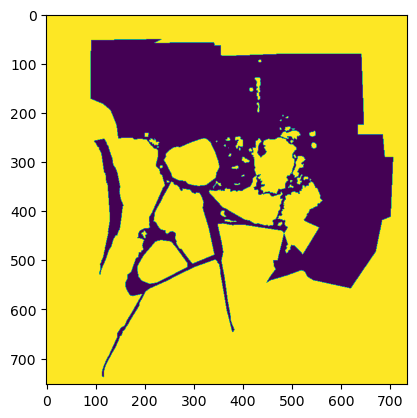

In [19]:
  plt.imshow(map1)

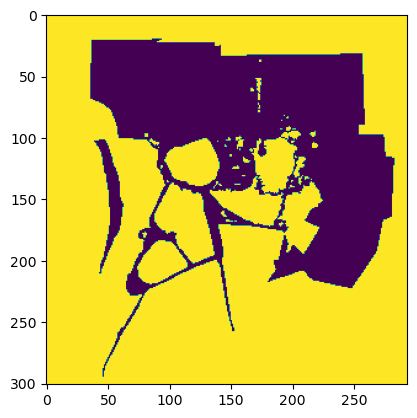

In [20]:
  plt.imshow(map2)

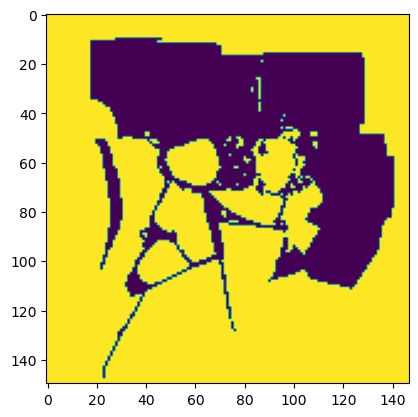

In [21]:
plt.imshow(map3)

In [35]:
from queue import PriorityQueue
import csv

# result = []
class AStar:
    
    def __init__(self,grid_matrix,grid_resolution, start, goal):
        self.grid_matrix = grid_matrix
        self.grid_resolution = grid_resolution
        self.start_x = int((start[0]/self.grid_resolution))
        self.start_y = int((start[1]/self.grid_resolution))
        self.start = (self.start_x, self.start_y)
        self.goal_x = int((goal[0]/self.grid_resolution))
        self.goal_y = int((goal[1]/self.grid_resolution))
        self.goal = (self.goal_x, self.goal_y)
        self.goal_found = False
        self.parent_node = {}
        self.distance = {}
        self.visited = set()
        self.queue = PriorityQueue()
        self.actions = [(-1, 0),
                        (0, -1),
                        (1, 0),
                        (0, 1)]
        self.goal_distance = None
        self.result = None
        
    def ManhattanDistance(self, current_node):
        ## creating the Heuristic function, cost(f(x)) = g(x) + h(x)
        manhattan_distance = abs(current_node[0] - self.goal[0]) + abs(current_node[1] - self.goal[1])
        return manhattan_distance

    def find_path(self):


        for i in range(len(self.grid_matrix[0])):
            for j in range(len(self.grid_matrix)):
                self.distance[(i, j)] = float('inf')
        self.distance[self.start] = 0 + self.ManhattanDistance(self.start)
        self.queue.put((self.distance[self.start], self.start))
    #     print(f'The queue is {queue.get()}')
        
        if self.grid_matrix[self.start[1],self.start[0]] == 1:
            self.result = "Start node is an Obstacle!!"
            return print("Start node is an Obstacle!!")

        if self.grid_matrix[self.goal[1],self.goal[0]] == 1:
            self.result = "Goal is an Obstacle!!"
            
            return print("Goal is an Obstacle!!")


        while not self.queue.empty():
            current_distance, current_node = self.queue.get()


            self.visited.add((current_node))



            # Using the actions to search teh neighbouring nodes

            for action in self.actions:
                possible_col = current_node[0] + action[0]
                possible_row = current_node[1] + action[1]

                if (possible_col, possible_row) not in self.visited:
                    if 0 <= possible_row < len(self.grid_matrix) and 0 <= possible_col < len(self.grid_matrix[0]) and self.grid_matrix[possible_row][possible_col] != 1:
                        new_distance = current_distance + 1 + self.ManhattanDistance((possible_col, possible_row))
                        if new_distance < self.distance[(possible_col, possible_row)]:
                            self.distance[(possible_col, possible_row)] = new_distance
                            self.queue.put((new_distance, (possible_col, possible_row)))
                            
                            
                            possible_node = (new_distance, (possible_col, possible_row))
                            self.parent_node[possible_node] = (current_distance, current_node)
    
            if current_node == self.goal:
                self.goal_found = True 
                self.goal_distance = current_distance
                self.result = "Path Found!!!"
                
                print("Path Found!!!")
                print("\nGenerating Path.........\n" )
                path = self.get_shortest_path()
                print(path)
                break            
                            

        if self.goal_found != True:
            self.result = "Path not Found!!"
            print("Path not Found!!")

    def get_shortest_path(self):
        
        route = PriorityQueue()
        
        child_node = (self.goal_distance, self.goal)


        while child_node in self.parent_node:
            route.put((self.parent_node[child_node]))
            child_node = self.parent_node[child_node]
            
            
            
        path = []

        for i in range(0, route.qsize()):

            distance, position = route.get()

            path.append((round((position[0])*self.grid_resolution), round((position[1])*self.grid_resolution)))



        position = self.goal
        path.append((round((self.goal[0])*self.grid_resolution), round((self.goal[1])*self.grid_resolution)))


        return path





### Running the starts and goals all at once for resolution 1, 2, 5 and 10 map

In [23]:
Columns = ['Algorithm','Start','Goal','Resolution','Result','Time(s)']

In [50]:
Results_resolution_1_AStar = pd.DataFrame(columns= Columns)

In [27]:
Results_resolution_2_AStar = pd.DataFrame(columns= Columns)

In [28]:
Results_resolution_5_AStar = pd.DataFrame(columns= Columns)

In [29]:
Results_resolution_10_AStar = pd.DataFrame(columns= Columns)

In [51]:
start_list = [(224, 158),(224, 158),(224, 158),(224, 158),(436, 892),(436, 892),(436, 892),(436, 892)]
goal_list = [(232, 1468),(964, 870),(304, 72),(274, 840),(232, 1468),(964, 870),(304, 72),(274, 840)]

for i, (start, goal) in enumerate(zip(start_list, goal_list)):
    print(f"For start= {start} and goal = {goal}")
    start_time = time.time()
    # distance, queue = initialize(map4, start)
    astar = AStar(map4,1,start,goal)
    shortest_path = astar.find_path()

    end_time = time.time()
    # print(path)
    total_time = end_time - start_time
    print("")
    print(f'Time taken to run the algorithm is {total_time}\n')
    Results_resolution_1_AStar.loc[i] = ['AStar',str(start),str(goal),1,astar.result,total_time]

For start= (224, 158) and goal = (232, 1468)
Path Found!!!

Generating Path.........

[(224, 158), (224, 159), (224, 160), (224, 161), (224, 162), (224, 163), (224, 164), (224, 165), (224, 166), (224, 167), (224, 168), (224, 169), (224, 170), (224, 171), (224, 172), (224, 173), (224, 174), (224, 175), (224, 176), (224, 177), (224, 178), (224, 179), (224, 180), (224, 181), (224, 182), (224, 183), (224, 184), (224, 185), (224, 186), (224, 187), (224, 188), (224, 189), (224, 190), (224, 191), (224, 192), (224, 193), (224, 194), (224, 195), (224, 196), (224, 197), (224, 198), (224, 199), (224, 200), (224, 201), (224, 202), (224, 203), (224, 204), (224, 205), (224, 206), (224, 207), (224, 208), (224, 209), (224, 210), (224, 211), (224, 212), (224, 213), (224, 214), (224, 215), (224, 216), (224, 217), (224, 218), (224, 219), (224, 220), (224, 221), (224, 222), (224, 223), (224, 224), (224, 225), (224, 226), (224, 227), (224, 228), (224, 229), (224, 230), (224, 231), (224, 232), (224, 233), (

Path Found!!!

Generating Path.........

[(224, 158), (224, 159), (224, 160), (224, 161), (224, 162), (224, 163), (224, 164), (224, 165), (224, 166), (224, 167), (224, 168), (224, 169), (224, 170), (224, 171), (224, 172), (224, 173), (224, 174), (224, 175), (224, 176), (224, 177), (224, 178), (224, 179), (224, 180), (224, 181), (224, 182), (224, 183), (224, 184), (224, 185), (224, 186), (224, 187), (224, 188), (224, 189), (224, 190), (224, 191), (224, 192), (224, 193), (224, 194), (224, 195), (224, 196), (224, 197), (224, 198), (224, 199), (224, 200), (224, 201), (224, 202), (224, 203), (224, 204), (224, 205), (224, 206), (224, 207), (224, 208), (224, 209), (224, 210), (224, 211), (224, 212), (224, 213), (224, 214), (224, 215), (224, 216), (224, 217), (224, 218), (224, 219), (224, 220), (224, 221), (224, 222), (224, 223), (224, 224), (224, 225), (224, 226), (224, 227), (224, 228), (224, 229), (224, 230), (224, 231), (224, 232), (224, 233), (224, 234), (224, 235), (224, 236), (224, 237)

Goal is an Obstacle!!

Time taken to run the algorithm is 1.0703239440917969

For start= (224, 158) and goal = (274, 840)
Path not Found!!

Time taken to run the algorithm is 6.06641697883606

For start= (436, 892) and goal = (232, 1468)
Path Found!!!

Generating Path.........

[(436, 892), (435, 892), (434, 892), (433, 892), (432, 892), (431, 892), (430, 892), (429, 892), (428, 892), (427, 892), (426, 892), (425, 892), (424, 892), (423, 892), (422, 892), (421, 892), (420, 892), (419, 892), (418, 892), (417, 892), (416, 892), (415, 892), (414, 892), (413, 892), (412, 892), (411, 892), (411, 893), (411, 894), (411, 895), (411, 896), (410, 896), (410, 897), (409, 897), (409, 898), (408, 898), (407, 898), (407, 899), (406, 899), (406, 900), (406, 901), (406, 902), (406, 903), (406, 904), (406, 905), (406, 906), (406, 907), (406, 908), (406, 909), (406, 910), (406, 911), (405, 911), (404, 911), (404, 912), (403, 912), (402, 912), (401, 912), (400, 912), (399, 912), (399, 913), (399, 914), 

Path Found!!!

Generating Path.........

[(436, 892), (437, 892), (438, 892), (439, 892), (440, 892), (441, 892), (442, 892), (443, 892), (444, 892), (445, 892), (446, 892), (447, 892), (448, 892), (449, 892), (450, 892), (451, 892), (452, 892), (453, 892), (454, 892), (455, 892), (456, 892), (457, 892), (458, 892), (459, 892), (460, 892), (461, 892), (462, 892), (463, 892), (464, 892), (465, 892), (466, 892), (467, 892), (468, 892), (469, 892), (470, 892), (471, 892), (472, 892), (473, 892), (474, 892), (475, 892), (476, 892), (477, 892), (478, 892), (479, 892), (480, 892), (481, 892), (482, 892), (483, 892), (484, 892), (485, 892), (486, 892), (487, 892), (488, 892), (488, 893), (489, 893), (489, 894), (489, 895), (490, 895), (490, 896), (491, 896), (492, 896), (493, 896), (494, 896), (495, 896), (496, 896), (497, 896), (498, 896), (499, 896), (500, 896), (501, 896), (502, 896), (503, 896), (504, 896), (505, 896), (506, 896), (507, 896), (508, 896), (509, 896), (510, 896), (511, 896)

Goal is an Obstacle!!

Time taken to run the algorithm is 0.8361072540283203

For start= (436, 892) and goal = (274, 840)
Path not Found!!

Time taken to run the algorithm is 5.957559585571289



In [52]:
Results_resolution_1_AStar

,Algorithm,Start,Goal,Resolution,Result,Time(s)
0,AStar,"(224, 158)","(232, 1468)",1,Path Found!!!,3.389878
1,AStar,"(224, 158)","(964, 870)",1,Path Found!!!,4.202629
2,AStar,"(224, 158)","(304, 72)",1,Goal is an Obstacle!!,1.070324
3,AStar,"(224, 158)","(274, 840)",1,Path not Found!!,6.066417
4,AStar,"(436, 892)","(232, 1468)",1,Path Found!!!,1.392032
5,AStar,"(436, 892)","(964, 870)",1,Path Found!!!,1.158505
6,AStar,"(436, 892)","(304, 72)",1,Goal is an Obstacle!!,0.836107
7,AStar,"(436, 892)","(274, 840)",1,Path not Found!!,5.957560


In [48]:
start_list = [(224, 158),(224, 158),(224, 158),(224, 158),(436, 892),(436, 892),(436, 892),(436, 892)]
goal_list = [(232, 1468),(964, 870),(304, 72),(274, 840),(232, 1468),(964, 870),(304, 72),(274, 840)]

for i, (start, goal) in enumerate(zip(start_list, goal_list)):
    print(f"For start= {start} and goal = {goal}")
    start_time = time.time()
    # distance, queue = initialize(map4, start)
    astar = AStar(map1,2,start,goal)
    shortest_path = astar.find_path()

    end_time = time.time()
    # print(path)
    total_time = end_time - start_time
    print("")
    print(f'Time taken to run the algorithm is {total_time}\n')
    Results_resolution_2_AStar.loc[i] = ['AStar',str(start),str(goal),2,astar.result,total_time]

For start= (224, 158) and goal = (232, 1468)
Path Found!!!

Generating Path.........

[(224, 158), (224, 160), (224, 162), (224, 164), (224, 166), (224, 168), (224, 170), (224, 172), (224, 174), (224, 176), (224, 178), (224, 180), (224, 182), (224, 184), (224, 186), (224, 188), (224, 190), (224, 192), (224, 194), (224, 196), (224, 198), (224, 200), (224, 202), (224, 204), (224, 206), (224, 208), (224, 210), (224, 212), (224, 214), (224, 216), (224, 218), (224, 220), (224, 222), (224, 224), (224, 226), (224, 228), (224, 230), (224, 232), (224, 234), (224, 236), (224, 238), (224, 240), (224, 242), (224, 244), (224, 246), (224, 248), (224, 250), (224, 252), (224, 254), (224, 256), (224, 258), (224, 260), (224, 262), (224, 264), (224, 266), (224, 268), (224, 270), (224, 272), (224, 274), (224, 276), (224, 278), (224, 280), (224, 282), (224, 284), (224, 286), (224, 288), (224, 290), (224, 292), (224, 294), (224, 296), (224, 298), (224, 300), (224, 302), (224, 304), (224, 306), (224, 308), (

Path Found!!!

Generating Path.........

[(224, 158), (224, 160), (224, 162), (224, 164), (224, 166), (224, 168), (224, 170), (224, 172), (224, 174), (224, 176), (224, 178), (224, 180), (224, 182), (224, 184), (224, 186), (224, 188), (224, 190), (224, 192), (224, 194), (224, 196), (224, 198), (224, 200), (224, 202), (224, 204), (224, 206), (224, 208), (224, 210), (224, 212), (224, 214), (224, 216), (224, 218), (224, 220), (224, 222), (224, 224), (224, 226), (224, 228), (224, 230), (224, 232), (224, 234), (224, 236), (224, 238), (224, 240), (224, 242), (224, 244), (224, 246), (224, 248), (224, 250), (224, 252), (224, 254), (224, 256), (224, 258), (224, 260), (224, 262), (224, 264), (224, 266), (224, 268), (224, 270), (224, 272), (224, 274), (224, 276), (224, 278), (224, 280), (224, 282), (224, 284), (224, 286), (224, 288), (224, 290), (224, 292), (224, 294), (224, 296), (224, 298), (224, 300), (224, 302), (224, 304), (224, 306), (224, 308), (224, 310), (224, 312), (224, 314), (224, 316)

Path not Found!!

Time taken to run the algorithm is 1.3277552127838135

For start= (436, 892) and goal = (232, 1468)
Path Found!!!

Generating Path.........

[(436, 892), (434, 892), (432, 892), (430, 892), (428, 892), (426, 892), (424, 892), (422, 892), (420, 892), (418, 892), (416, 892), (414, 892), (412, 892), (412, 894), (412, 896), (410, 896), (410, 898), (408, 898), (406, 898), (406, 900), (406, 902), (406, 904), (406, 906), (406, 908), (406, 910), (406, 912), (404, 912), (402, 912), (400, 912), (400, 914), (400, 916), (400, 918), (400, 920), (400, 922), (398, 922), (398, 924), (398, 926), (396, 926), (396, 928), (396, 930), (396, 932), (396, 934), (396, 936), (396, 938), (396, 940), (396, 942), (396, 944), (396, 946), (396, 948), (396, 950), (396, 952), (396, 954), (396, 956), (396, 958), (396, 960), (394, 960), (394, 962), (392, 962), (390, 962), (390, 964), (388, 964), (388, 966), (388, 968), (388, 970), (386, 970), (384, 970), (382, 970), (380, 970), (378, 970), (378, 972), 

Path not Found!!

Time taken to run the algorithm is 1.118561029434204



In [49]:
Results_resolution_2_AStar

,Algorithm,Start,Goal,Resolution,Result,Time(s)
0,AStar,"(224, 158)","(232, 1468)",2,Path Found!!!,0.824211
1,AStar,"(224, 158)","(964, 870)",2,Path Found!!!,0.841533
2,AStar,"(224, 158)","(304, 72)",2,Goal is an Obstacle!!,0.191516
3,AStar,"(224, 158)","(274, 840)",2,Path not Found!!,1.327755
4,AStar,"(436, 892)","(232, 1468)",2,Path Found!!!,0.267326
5,AStar,"(436, 892)","(964, 870)",2,Path Found!!!,0.230078
6,AStar,"(436, 892)","(304, 72)",2,Goal is an Obstacle!!,0.138390
7,AStar,"(436, 892)","(274, 840)",2,Path not Found!!,1.118561


In [42]:
start_list = [(224, 158),(224, 158),(224, 158),(224, 158),(436, 892),(436, 892),(436, 892),(436, 892)]
goal_list = [(232, 1468),(964, 870),(304, 72),(274, 840),(232, 1468),(964, 870),(304, 72),(274, 840)]

for i, (start, goal) in enumerate(zip(start_list, goal_list)):
    print(f"For start= {start} and goal = {goal}")
    start_time = time.time()
    # distance, queue = initialize(map4, start)
    astar = AStar(map2,5,start,goal)
    shortest_path = astar.find_path()

    end_time = time.time()
    # print(path)
    total_time = end_time - start_time
    print("")
    print(f'Time taken to run the algorithm is {total_time}\n')
    Results_resolution_5_AStar.loc[i] = ['AStar',str(start),str(goal),5,astar.result,total_time]    

For start= (224, 158) and goal = (232, 1468)
Path Found!!!

Generating Path.........

[(220, 155), (220, 160), (220, 165), (220, 170), (220, 175), (220, 180), (220, 185), (220, 190), (220, 195), (220, 200), (220, 205), (220, 210), (220, 215), (220, 220), (220, 225), (220, 230), (220, 235), (220, 240), (220, 245), (220, 250), (220, 255), (220, 260), (220, 265), (220, 270), (220, 275), (220, 280), (220, 285), (220, 290), (220, 295), (220, 300), (220, 305), (220, 310), (220, 315), (220, 320), (220, 325), (220, 330), (220, 335), (220, 340), (220, 345), (220, 350), (220, 355), (225, 355), (225, 360), (230, 360), (235, 360), (235, 365), (240, 365), (240, 370), (245, 370), (245, 375), (250, 375), (255, 375), (255, 380), (260, 380), (260, 385), (265, 385), (265, 390), (265, 395), (270, 395), (270, 400), (270, 405), (270, 410), (275, 410), (275, 415), (275, 420), (280, 420), (280, 425), (280, 430), (280, 435), (285, 435), (285, 440), (285, 445), (285, 450), (290, 450), (290, 455), (290, 460), (

Path Found!!!

Generating Path.........

[(435, 890), (430, 890), (425, 890), (420, 890), (415, 890), (410, 890), (410, 895), (410, 900), (405, 900), (405, 905), (405, 910), (400, 910), (400, 915), (400, 920), (400, 925), (395, 925), (395, 930), (395, 935), (395, 940), (395, 945), (395, 950), (395, 955), (395, 960), (390, 960), (390, 965), (390, 970), (385, 970), (380, 970), (380, 975), (375, 975), (375, 980), (375, 985), (375, 990), (370, 990), (370, 995), (365, 995), (365, 1000), (365, 1005), (365, 1010), (365, 1015), (365, 1020), (365, 1025), (365, 1030), (365, 1035), (365, 1040), (365, 1045), (365, 1050), (365, 1055), (365, 1060), (365, 1065), (365, 1070), (365, 1075), (365, 1080), (365, 1085), (365, 1090), (365, 1095), (365, 1100), (365, 1105), (365, 1110), (365, 1115), (365, 1120), (365, 1125), (365, 1130), (365, 1135), (370, 1135), (375, 1135), (380, 1135), (385, 1135), (390, 1135), (390, 1140), (390, 1145), (390, 1150), (385, 1150), (385, 1155), (380, 1155), (380, 1160), (380, 

In [44]:
Results_resolution_5_AStar

,Algorithm,Start,Goal,Resolution,Result,Time(s)
0,AStar,"(224, 158)","(232, 1468)",5,Path Found!!!,0.189033
1,AStar,"(224, 158)","(964, 870)",5,Path Found!!!,0.119443
2,AStar,"(224, 158)","(304, 72)",5,Goal is an Obstacle!!,0.026177
3,AStar,"(224, 158)","(274, 840)",5,Path not Found!!,0.166777
4,AStar,"(436, 892)","(232, 1468)",5,Path Found!!!,0.032821
5,AStar,"(436, 892)","(964, 870)",5,Path Found!!!,0.034919
6,AStar,"(436, 892)","(304, 72)",5,Goal is an Obstacle!!,0.021947
7,AStar,"(436, 892)","(274, 840)",5,Path not Found!!,0.292910


In [45]:
start_list = [(224, 158),(224, 158),(224, 158),(224, 158),(436, 892),(436, 892),(436, 892),(436, 892)]
goal_list = [(232, 1468),(964, 870),(304, 72),(274, 840),(232, 1468),(964, 870),(304, 72),(274, 840)]

for i, (start, goal) in enumerate(zip(start_list, goal_list)):
    print(f"For start= {start} and goal = {goal}")
    start_time = time.time()
    # distance, queue = initialize(map4, start)
    astar = AStar(map3,10,start,goal)
    shortest_path = astar.find_path()

    end_time = time.time()
    # print(path)
    total_time = end_time - start_time
    print("")
    print(f'Time taken to run the algorithm is {total_time}\n')
    Results_resolution_10_AStar.loc[i] = ['AStar',str(start),str(goal),10,astar.result,total_time]   

For start= (224, 158) and goal = (232, 1468)
Path not Found!!

Time taken to run the algorithm is 0.06481790542602539

For start= (224, 158) and goal = (964, 870)
Path Found!!!

Generating Path.........

[(220, 150), (220, 160), (220, 170), (220, 180), (220, 190), (220, 200), (220, 210), (220, 220), (220, 230), (220, 240), (220, 250), (220, 260), (220, 270), (220, 280), (220, 290), (220, 300), (220, 310), (220, 320), (220, 330), (220, 340), (220, 350), (230, 350), (230, 360), (240, 360), (240, 370), (250, 370), (260, 370), (260, 380), (260, 390), (270, 390), (270, 400), (270, 410), (280, 410), (280, 420), (280, 430), (280, 440), (290, 440), (290, 450), (290, 460), (290, 470), (290, 480), (290, 490), (300, 490), (310, 490), (320, 490), (330, 490), (340, 490), (350, 490), (350, 500), (360, 500), (370, 500), (380, 500), (390, 500), (400, 500), (410, 500), (420, 500), (430, 500), (440, 500), (450, 500), (450, 510), (460, 510), (460, 520), (460, 530), (460, 540), (460, 550), (460, 560), (46

In [46]:
Results_resolution_10_AStar

,Algorithm,Start,Goal,Resolution,Result,Time(s)
0,AStar,"(224, 158)","(232, 1468)",10,Path not Found!!,0.064818
1,AStar,"(224, 158)","(964, 870)",10,Path Found!!!,0.028841
2,AStar,"(224, 158)","(304, 72)",10,Goal is an Obstacle!!,0.004903
3,AStar,"(224, 158)","(274, 840)",10,Path not Found!!,0.036473
4,AStar,"(436, 892)","(232, 1468)",10,Path not Found!!,0.005929
5,AStar,"(436, 892)","(964, 870)",10,Path not Found!!,0.005161
6,AStar,"(436, 892)","(304, 72)",10,Goal is an Obstacle!!,0.004207
7,AStar,"(436, 892)","(274, 840)",10,Path not Found!!,0.005181


In [12]:
map3[146][23]

1.0